In [1]:
# external imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# internal imports
from env_builder import EnvBuilder

## Define the Spacecraft's Properties

A sample LEO spacecraft is used with initial state (calculated from TLE):

> r: [-5062.82221407, 389.37651319, 4725.61337014] km  
> v: [-0.1794572, -7.56685984, 0.43122637] km/s

With attributes:

> area: 4.908 $m^2$  
> cd: 2.2  
> mass: 260 kg  
> mu: 398600.435436 $km^3 / s^2$


In [2]:
# initial state of spacecraft
r0 = np.array([-5062.82221407, 389.37651319, 4725.61337014])
v0 = np.array([-0.1794572, -7.56685984, 0.43122637])

In [3]:
# set initial conditions
area=1.25**2 * np.pi
cd=2.2
mass=260
mu=398600.435436
t0=0.0
tf= 1800.0 * 24 * 3600
dx= 60.0
perts_100="obj1_1800days_perts.txt"
no_perts_100="obj1_1800days.txt"

init_jd = 2460250.67394

# set up object parameters
rusty_link = EnvBuilder(r0, v0, area, mass, init_jd)

# build txt file with pertubations and without
rusty_link.propagate(t0, tf, dx, perts_100, add_pertubations="true")
# rusty_link.propagate(t0, tf, dx, no_perts_100, add_pertubations="false")

Environment created
Propagation was successfully run


## Plot the Position of the Spacecraft

Various elements of the orbit can be calculated from the produced state vectors. For simplicity, the magnitude of the position are plotted here to show the orbital decay.

In [4]:
# plot the simulated data
def plot_results(df, min_r):
    
    df["r_mag"] = np.linalg.norm(df.values[:, 1:4], axis=1)
     
    df = df[df.r_mag < min_r]
    
    plt.plot(df.values[:,0]/3600/24, df.r_mag.values - 6378)
    plt.title("Pertibational Effects on Spacecraft Position")
    plt.xlabel("Time (days)")
    plt.ylabel("Altitude (km)")

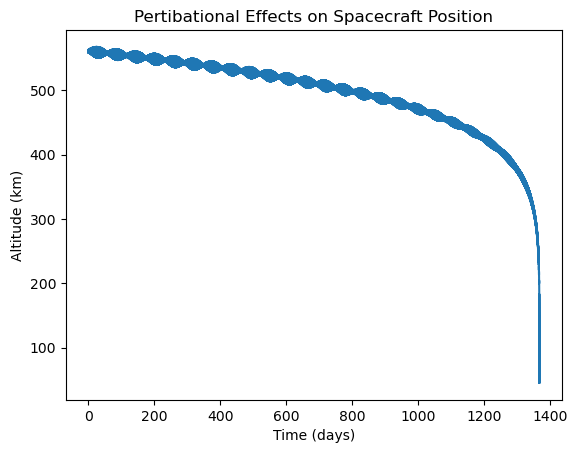

In [5]:
# load in the data from the orbit
results = pd.read_csv("obj1_1800days_perts.txt", header = None, low_memory = False)
results = results.astype("float")

# plot
min_r = 8000 # this is alt + radius of earth (km)
plot_results(results, min_r)